In [1]:
%matplotlib inline 
import matplotlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas

In [3]:
sns.set_style('white')
sns.set_palette('colorblind')

In [4]:
DATASET_LOCATION = "../../data/assisstments2010/skill_builder_data_corrected.csv"

In [5]:
dataset = pandas.read_csv(DATASET_LOCATION)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
important_columns = ['order_id', 'assignment_id', 'user_id', 'problem_id', 'sequence_id', 'correct']

In [7]:
dataset[important_columns][:10]

,order_id,assignment_id,user_id,problem_id,sequence_id,correct
0,33022537,277618,64525,51424,5948,1
1,33022709,277618,64525,51435,5948,1
2,35450204,220674,70363,51444,5948,0
3,35450295,220674,70363,51395,5948,1
4,35450311,220674,70363,51481,5948,0
5,35450555,220674,70363,51457,5948,1
6,35450573,220674,70363,51459,5948,1
7,35480603,220674,70363,51408,5948,1
8,33140811,220674,70677,51453,5948,1
9,33140919,220674,70677,51397,5948,1


Do we have duplicate order ids?

In [8]:
dataset.order_id.unique().shape[0] != dataset.shape[0]

True

This means there still are duplicate rows for problems with more than one skill associated.

In [9]:
dataset[['order_id', 'problem_id', 'user_id']].groupby('order_id').user_id.nunique().max()

1

In [10]:
dataset.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

General
----

Total number of unique interactions:

In [11]:
dataset.shape[0]

346860

Students
----
The total number of students is:

In [12]:
dataset['user_id'].unique().shape[0]

4217

The distribution of the number of interactions per student is:

In [13]:
counts_by_user = dataset[['user_id', 'correct', 'order_id']].groupby(['correct', 'user_id']).count()
counts_by_user[:10]

order_id
correct user_id          
0       14             18
        21825           5
        51933           1
        51950           1
        52613           2
        53167          91
        54318           4
        58161           6
        64525          91
        64535           5

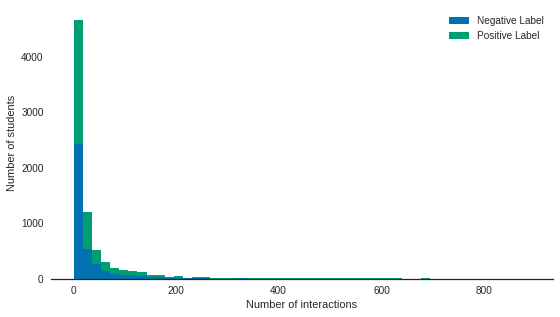

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([counts_by_user.loc[0].order_id.values, counts_by_user.loc[1].order_id.values],
         bins=50, stacked=True, rwidth=1.0, label=['Negative Label', 'Positive Label'])
ax.legend()
ax.set_xlabel('Number of interactions')
ax.set_ylabel('Number of students')
sns.despine(left=True)

Problems
----

In [15]:
dataset.problem_id.unique().shape[0]

26688

In [17]:
counts_by_problem = dataset[['problem_id', 'correct', 'order_id']].groupby(['correct', 'problem_id']).count()
counts_by_problem[:10]

order_id
correct problem_id          
0       83                 2
        84                 4
        85                 4
        86                 5
        249                1
        250                1
        251                1
        252                2
        807                7
        808                7

In [25]:
counts_by_problem.reset_index().groupby('order_id').count()

,correct,problem_id
order_id,,
1,8711,8711
2,6409,6409
3,4506,4506
4,3645,3645
5,2724,2724
6,2443,2443
7,1891,1891
8,1640,1640
9,1364,1364


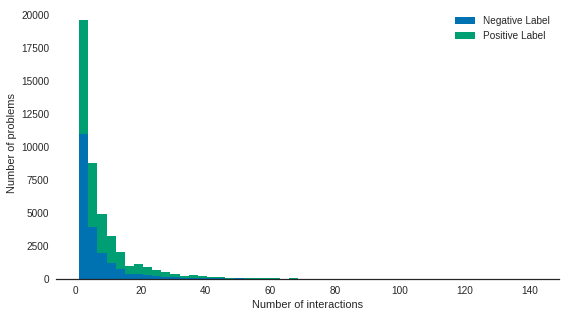

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([counts_by_problem.loc[0].order_id.values, counts_by_problem.loc[1].order_id.values],
         bins=50, stacked=True, rwidth=1.0, label=['Negative Label', 'Positive Label'])
ax.legend()
ax.set_xlabel('Number of interactions')
ax.set_ylabel('Number of problems')
sns.despine(left=True)

Correlations
====

In [143]:
from sklearn import metrics

Baseline of student mode prediction
---

In [140]:
student_mode = dataset[['user_id', 'correct']].groupby(by='user_id').apply(pandas.DataFrame.mode)

student_mode.index = student_mode.index.droplevel(1)

student_mode = student_mode.drop('user_id', 1).reset_index().rename(
    columns={'correct': 'prediction'})

In [142]:
prediction_student_mode = dataset[['order_id', 'user_id', 'correct']].merge(student_mode)
prediction_student_mode

,order_id,user_id,correct,prediction
0,33022537,64525,1,1.0
1,33022709,64525,1,1.0
2,28186893,64525,1,1.0
3,28187093,64525,1,1.0
4,32413158,64525,1,1.0
5,33022751,64525,0,1.0
6,33023039,64525,1,1.0
7,33023131,64525,1,1.0
8,33023183,64525,1,1.0
9,33023245,64525,0,1.0


In [147]:
print metrics.classification_report(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

             precision    recall  f1-score   support

          0       0.65      0.29      0.40    123825
          1       0.70      0.91      0.79    224627

avg / total       0.68      0.69      0.65    348452



In [150]:
metrics.mean_squared_error(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

0.30837819843192177

In [177]:
metrics.roc_auc_score(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

0.60219909127393656

Baseline with problem mode prediction
---

In [151]:
problem_mode = dataset[['problem_id', 'correct']].groupby(by='problem_id').apply(pandas.DataFrame.mode)

problem_mode.index = problem_mode.index.droplevel(1)

problem_mode = problem_mode.drop('problem_id', 1).reset_index().rename(
    columns={'correct': 'prediction'})

In [156]:
prediction_problem_mode = dataset[['order_id', 'problem_id', 'correct']].merge(problem_mode)
prediction_problem_mode

,order_id,problem_id,correct,prediction
0,33022537,51424,1,1.0
1,35517819,51424,1,1.0
2,31390687,51424,1,1.0
3,31386114,51424,1,1.0
4,32238361,51424,1,1.0
5,30454021,51424,0,1.0
6,35407964,51424,1,1.0
7,35410508,51424,1,1.0
8,35396255,51424,1,1.0
9,35256376,51424,1,1.0


In [157]:
print metrics.classification_report(
    prediction_problem_mode.correct, prediction_problem_mode.prediction.fillna(0).astype(int))

             precision    recall  f1-score   support

          0       0.65      0.45      0.53    127017
          1       0.74      0.86      0.80    227496

avg / total       0.71      0.72      0.70    354513



In [179]:
metrics.roc_auc_score(
    prediction_problem_mode.correct, prediction_problem_mode.prediction.fillna(0).astype(int))

0.65892859860448683

In [197]:
groups = dataset[important_columns].groupby('user_id')
splitted = [groups.get_group(x) for x in groups.groups]

In [198]:
splitted[0].sort_values(by='order_id', inplace=True)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [200]:
ss = splitted[0]

In [209]:
ss['next_exercise'] = ss.problem_id.shift(-1).fillna(0).astype(int)
ss['next_correct'] = ss.correct.shift(-1).fillna(0).astype(int)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [244]:
from sklearn.preprocessing import OneHotEncoder
vect = OneHotEncoder()
vect.fit_transform(ss[['problem_id']])

<40x40 sparse matrix of type '<type 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [255]:
pr = vect.transform(ss[['problem_id']])

In [258]:
pr.indices

array([38, 39, 36, 37, 30, 31, 20, 21, 22, 23, 32, 33, 26, 27, 24, 25, 34,
       35, 28, 29,  9,  6,  4,  0,  5,  7,  1,  8,  3,  2, 13, 14, 12, 15,
       19, 18, 16, 11, 17, 10], dtype=int32)

In [269]:
np.roll(pr.indices, -1)

array([39, 36, 37, 30, 31, 20, 21, 22, 23, 32, 33, 26, 27, 24, 25, 34, 35,
       28, 29,  9,  6,  4,  0,  5,  7,  1,  8,  3,  2, 13, 14, 12, 15, 19,
       18, 16, 11, 17, 10, 38], dtype=int32)